In [7]:
import numpy as np
import matplotlib.pyplot as plt
import causaldag as cd
import sempler as sempler
from sempler import utils

In [8]:
W = utils.eg1()[0]
sem = sempler.LGANM(W, (0,1))
d0 = sem.sample(population = True)

In [32]:
def O(B, covariance = d0.covariance, truth = sem.variances):
    p = len(covariance)
    omega = (np.eye(p) - B).T @ covariance @ (np.eye(p) - B)
    plt.subplot(121), plt.imshow(np.diag(truth))
    plt.subplot(122), plt.imshow(omega)
    return omega

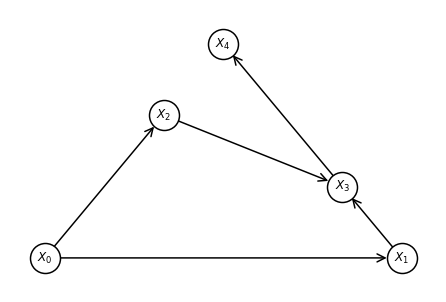

In [25]:
utils.plot_graph(W)

In [26]:
W

array([[ 0,  1, -1,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0]])

array([[3.47882568e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 6.72359414e-01, 0.00000000e+00, 1.11022302e-16,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.91191469e-01, 1.11022302e-16,
        0.00000000e+00],
       [0.00000000e+00, 1.11022302e-16, 1.11022302e-16, 4.65195020e-01,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.42461193e-01]])

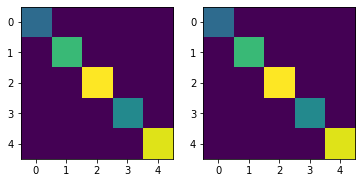

In [33]:
O(sem.W)

array([[ 1.28966783e-01, -1.20671702e-16,  1.12757026e-16,
        -3.20923843e-17, -1.21430643e-16],
       [-1.86320143e-16,  1.67406788e-01,  2.03830008e-17,
        -9.76866157e-17, -3.42174206e-16],
       [ 3.46944695e-18,  1.90819582e-17,  5.18160255e-01,
        -9.02056208e-17, -8.32667268e-16],
       [ 2.35922393e-16, -1.27502175e-16,  2.77555756e-17,
         1.67808656e+00, -3.74700271e-16],
       [-1.66533454e-16, -4.57966998e-16, -8.88178420e-16,
        -4.99600361e-16,  5.41453120e+00]])

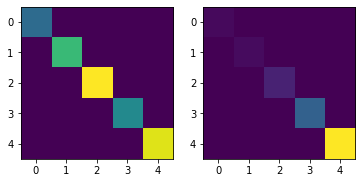

In [34]:
_, eigvec = np.linalg.eigh(d0.covariance)
B = np.eye(sem.p) - eigvec
O(B)